# 01.5 - Manipulação e interpretação de gráficos
## Analisando dados da saúde com Python e Pandas

Dataset: http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def
Filtros aplicados:
 - Linha: Unidade da Federação
 - Coluna: Ano/Mês atendimento
 - Conteúdo: Valor total
 - Períodos disponíveis: Jan/2008 até Mar/2021
 
 [<- Voltar para o repositório](https://github.com/aureliowozhiak/Bootcamp-Data-Science-Aplicada)

In [2]:
#importando biblioteca pandas
import pandas as pd

In [5]:
#lendo o arquivo csv com algumas especificações de enconding, padrão do separador ";",
#e identificador de milhares e decimal
#também foi usado os parametros skip pra pular as 3 primeiras e 12 ultimas linhas q não fazem parte dos dados em si!
dados = pd.read_csv("../datasets/A202613189_28_143_208.csv", encoding="ISO-8859-1",
                   skiprows = 3, sep=";", skipfooter=12,
                   thousands=".", decimal=",")
#mostrando apenas os primeiros dados do dataframe
dados

<ipython-input-5-13c9f7913540>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados = pd.read_csv("../datasets/A202613189_28_143_208.csv", encoding="ISO-8859-1",


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,1.047999e+07,1.143347e+07,8.876900e+06,8.167253e+06,8.759014e+06,9.003402e+06,8.414691e+06,6.039420e+06,4.732441e+06,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4.053085e+06,3.658266e+06,3.470409e+06,3.267919e+06,3.393958e+06,3.711661e+06,3.005561e+06,2.272734e+06,1.137342e+06,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,1.930374e+07,1.868723e+07,1.862863e+07,1.872825e+07,2.045157e+07,2.154606e+07,2.443906e+07,1.367936e+07,6.799061e+06,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3.192075e+06,3.262354e+06,2.978629e+06,3.313297e+06,3.527263e+06,3.125022e+06,3.209324e+06,3.044799e+06,2.381844e+06,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,4.049635e+07,3.879339e+07,3.696595e+07,3.840662e+07,3.704303e+07,3.691444e+07,3.388777e+07,2.334322e+07,1.306956e+07,4.705309e+09
5,16 Amapá,-,-,-,-,-,-,-,-,-,...,2.536643e+06,2.702550e+06,2.533445e+06,2.762003e+06,2.714711e+06,2.826612e+06,2.513766e+06,1.534733e+06,9.891554e+05,3.098601e+08
6,17 Tocantins,-,-,-,-,-,-,-,-,-,...,7.934629e+06,6.488928e+06,4.229377e+06,1.853045e+06,5.090097e+05,6.893834e+05,3.476268e+05,4.165343e+05,9.287568e+05,1.020028e+09
7,21 Maranhão,-,-,-,-,-,-,-,-,-,...,3.399135e+07,3.271126e+07,3.198571e+07,3.443046e+07,3.244680e+07,3.092707e+07,2.679770e+07,2.326025e+07,1.729451e+07,3.871069e+09
8,22 Piauí,-,-,-,-,-,-,-,-,-,...,2.581744e+07,2.245226e+07,2.063700e+07,2.032681e+07,2.002200e+07,1.935222e+07,1.843728e+07,1.363601e+07,9.542152e+06,2.280889e+09
9,23 Ceará,-,-,-,-,-,-,-,-,-,...,5.844849e+07,5.511819e+07,5.382749e+07,5.467965e+07,5.402629e+07,5.027155e+07,4.374343e+07,3.018695e+07,1.717315e+07,6.591837e+09


In [3]:
#formatando as casas decimais
pd.options.display.float_format = "{:.2f}".format

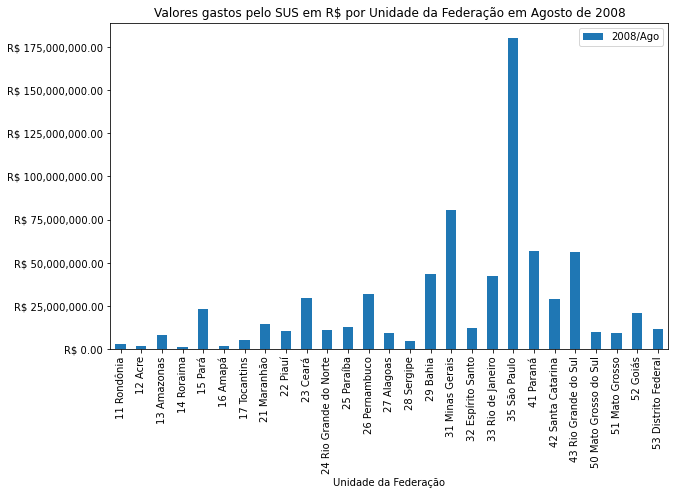

In [4]:
#O pandas não é uma biblioteca gráfica, por conta disso, vamos importar uma biblioteca especifica para plotagem de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valores gastos pelo SUS em R$ por Unidade da Federação em Agosto de 2008")
plt.show()

In [5]:
#Pegamos apenas os anos usaveis
colunas_usaveis = dados.mean().index.tolist()
#adicionamos o indice 0 como "Unidade da Federação"
colunas_usaveis.insert(0, "Unidade da Federação")

In [6]:
dados[colunas_usaveis].head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29


In [7]:
#criamos um dataframe "usaveis"
usaveis = dados[colunas_usaveis]

In [8]:
#Setamos o index "Unidade da Federação"
usaveis = usaveis.set_index("Unidade da Federação")

In [9]:
usaveis = usaveis.drop("Total", axis=1)

In [10]:
#Usando valores pseudo-aleatórios com uma seed predefinida
import numpy as np
np.random.seed(687942)

usaveis.sample(n=5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,23027750.86,28608103.39,25721339.11,25098604.18,25257993.78,24312931.74,27277816.41,23228004.80,18186942.80,8733455.36
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7871556.55,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,25045580.62,26428483.82,23875303.68,21771866.33,23087586.62,20668526.36,22552034.04,22573869.50,19004029.87,14731938.43


In [11]:
usaveis["Total"] = usaveis.sum(axis=1)

In [12]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996410650.35
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450047246.65
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917245104.64
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876551.40
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705290466.69


In [13]:
#Ordenando pelos estados do que mais gastou para o que menos gastou
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1038067423.15,172961999.58,170556696.16,170338163.23,172462057.87,...,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,206208080.90,70301089.50,79119005.51,79046322.41,79268070.12,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,251511992.03,44128159.73,42900847.02,45306499.53,43951349.46,...,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48


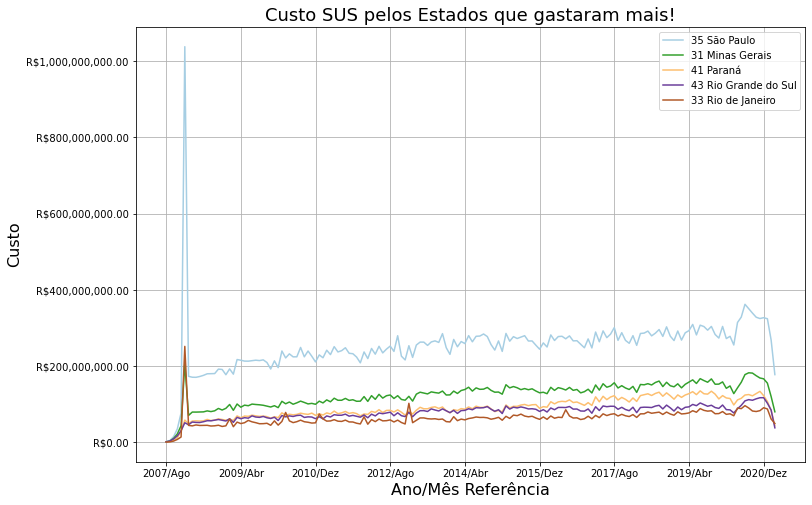

In [14]:
ax = ordenado_por_total.head(5).T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo SUS pelos Estados que gastaram mais!', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [15]:
estados = ordenado_por_total.head(5).index.to_list()
estados

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro']

In [16]:
estados.append("42 Santa Catarina")
estados

['35 São Paulo',
 '31 Minas Gerais',
 '41 Paraná',
 '43 Rio Grande do Sul',
 '33 Rio de Janeiro',
 '42 Santa Catarina']

In [17]:
type(estados)

list

In [18]:
#pegando apenas os dados após esse outlier de 2008/Jan
colunas_interessadas = ordenado_por_total.columns[6:]
colunas_interessadas

Index(['2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai', '2008/Jun', '2008/Jul',
       '2008/Ago', '2008/Set', '2008/Out', '2008/Nov',
       ...
       '2020/Jun', '2020/Jul', '2020/Ago', '2020/Set', '2020/Out', '2020/Nov',
       '2020/Dez', '2021/Jan', '2021/Fev', '2021/Mar'],
      dtype='object', length=158)

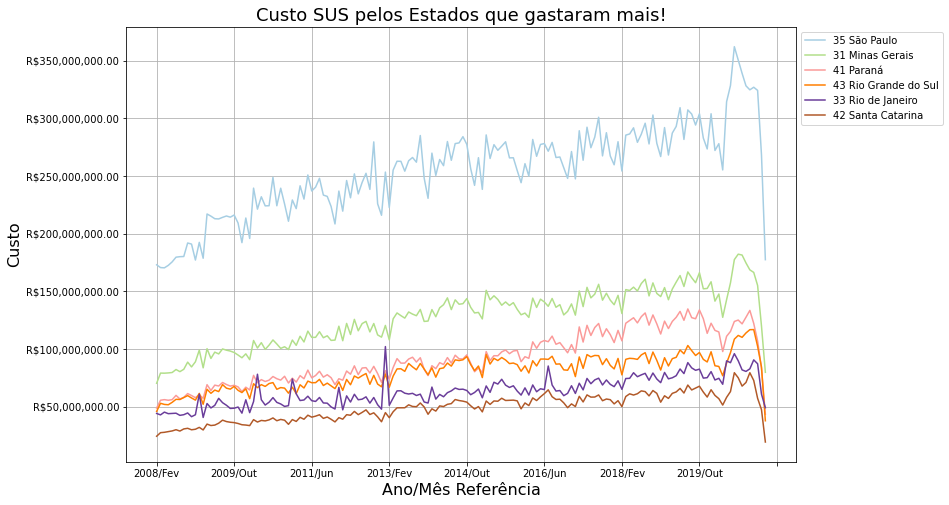

In [19]:
ax = ordenado_por_total[colunas_interessadas].loc[estados].T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo SUS pelos Estados que gastaram mais!', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [20]:
#adicionando regiões!
col_regiao=[]
regioes=['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']

for row in ordenado_por_total.iterrows():
    
    estado=row[0]
    num_reg = int(estado.split(' ')[0])
    new_estado = estado.split(' ', maxsplit =1)[1]
    filtrados = ordenado_por_total.rename(index={estado:new_estado})
    
    if num_reg < 20:
        col_regiao.append(regioes[0])
    elif num_reg < 30:
        col_regiao.append(regioes[1])
    elif num_reg < 40:
        col_regiao.append(regioes[2])
    elif num_reg < 50:
        col_regiao.append(regioes[3])
    else:
        col_regiao.append(regioes[4])

In [21]:
ordenado_por_total["Região"] = col_regiao

In [22]:
ordenado_por_total["Região"] == "Sudeste"

Unidade da Federação
35 São Paulo               True
31 Minas Gerais            True
41 Paraná                 False
43 Rio Grande do Sul      False
33 Rio de Janeiro          True
29 Bahia                  False
26 Pernambuco             False
42 Santa Catarina         False
23 Ceará                  False
52 Goiás                  False
15 Pará                   False
21 Maranhão               False
32 Espírito Santo          True
24 Rio Grande do Norte    False
25 Paraíba                False
53 Distrito Federal       False
50 Mato Grosso do Sul     False
22 Piauí                  False
27 Alagoas                False
51 Mato Grosso            False
13 Amazonas               False
28 Sergipe                False
17 Tocantins              False
11 Rondônia               False
12 Acre                   False
14 Roraima                False
16 Amapá                  False
Name: Região, dtype: bool

In [23]:
estados_sudeste = ordenado_por_total["Região"] == "Sudeste"
#adicionando paraná no sudeste :D
estados_sudeste["41 Paraná"] = True

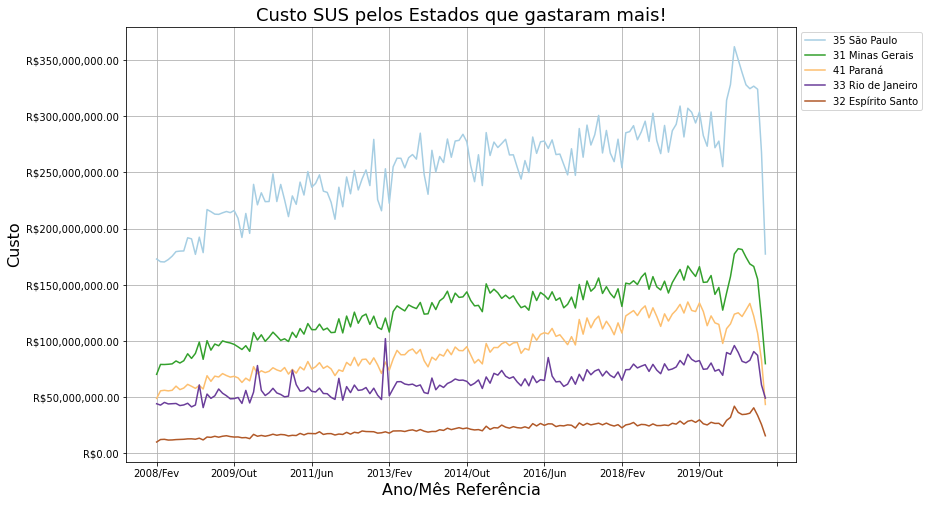

In [24]:
#Mostrando apenas os estados do sudeste
ax = ordenado_por_total[colunas_interessadas].loc[estados_sudeste].T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo SUS pelos Estados que gastaram mais!', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

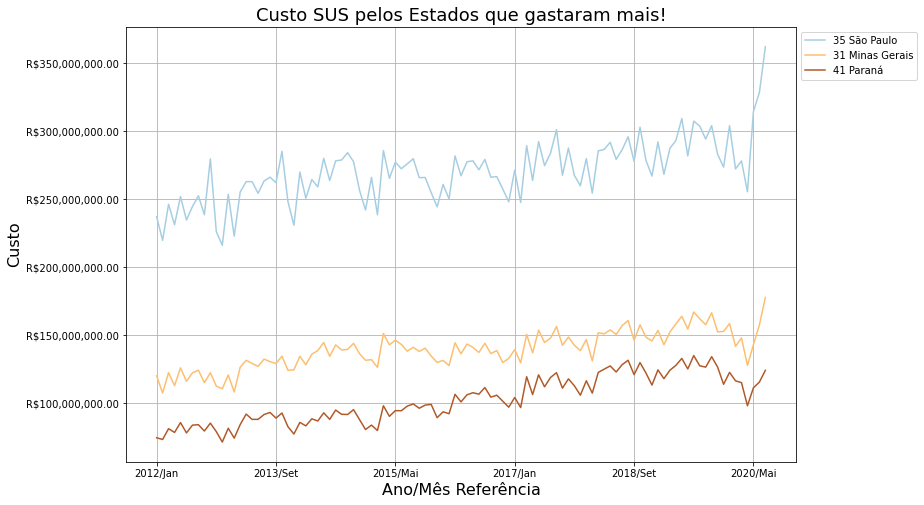

In [25]:
#pegando uma faixa menor de meses
meses_filtrados = colunas_interessadas[47:150]
ax = ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo SUS pelos Estados que gastaram mais!', fontsize=18)
plt.grid(True)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

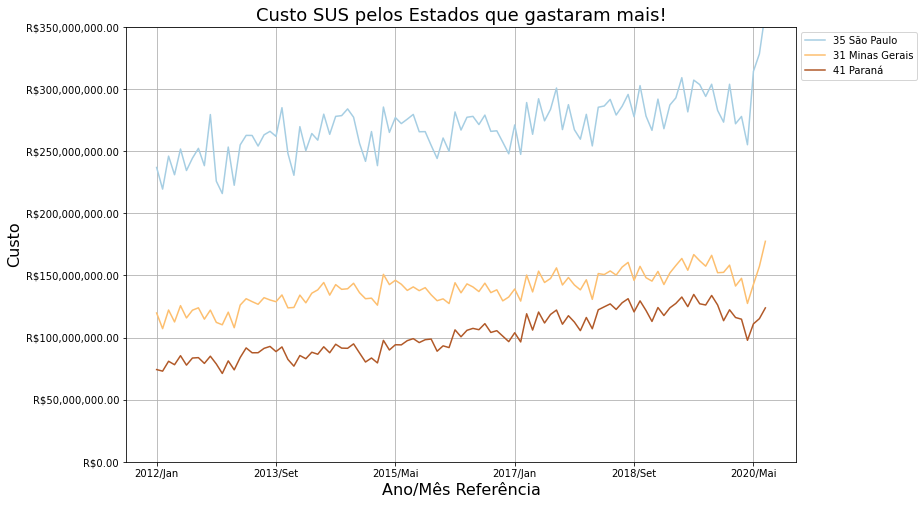

In [26]:
#pegando uma faixa menor de meses
meses_filtrados = colunas_interessadas[47:150]
ax = ordenado_por_total[meses_filtrados].head(3).T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
ax.set_xlabel('Ano/Mês Referência', fontsize=16)
ax.set_ylabel('Custo', fontsize=16)
plt.title('Custo SUS pelos Estados que gastaram mais!', fontsize=18)
plt.grid(True)
#adicionando um limite minimo e maximo no grafico
plt.ylim(0,350000000)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### É possivel manipular a percepção de quem está vendo o gráfico apenas cortando uma fatia dos dados, e isso é muito perigoso caso tenha alguma analise com um viés mal-intencionado

<AxesSubplot:>

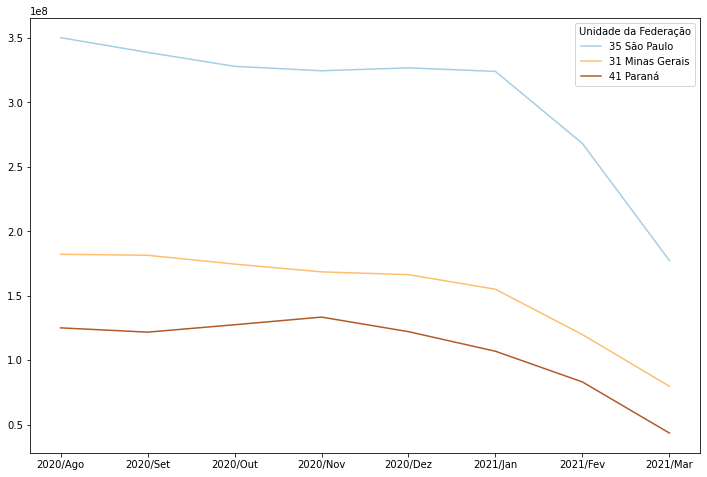

In [27]:
ordenado_por_total[colunas_interessadas[-8:]].head(3).T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))

<AxesSubplot:>

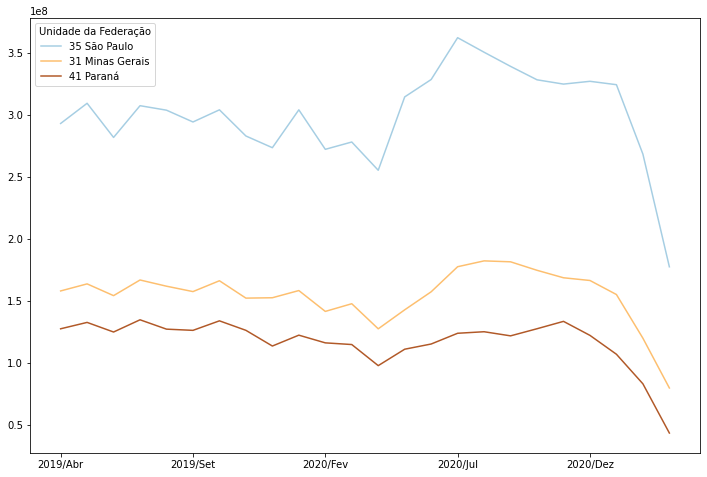

In [28]:
ordenado_por_total[colunas_interessadas[-24:]].head(3).T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))

<AxesSubplot:>

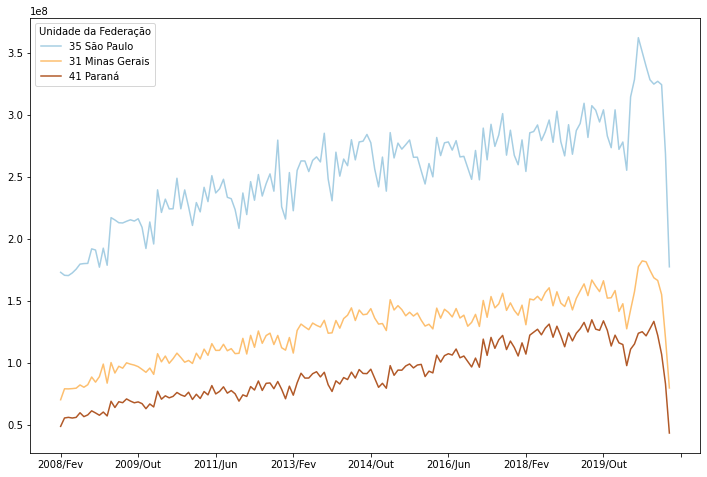

In [29]:
ordenado_por_total[colunas_interessadas[:]].head(3).T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))

### Vemos também que dependendo da largura e comprimento do figsize, podemos criar um senso de "o gráfico está crescendo de forma mais rapida ou mais lenta"

<AxesSubplot:>

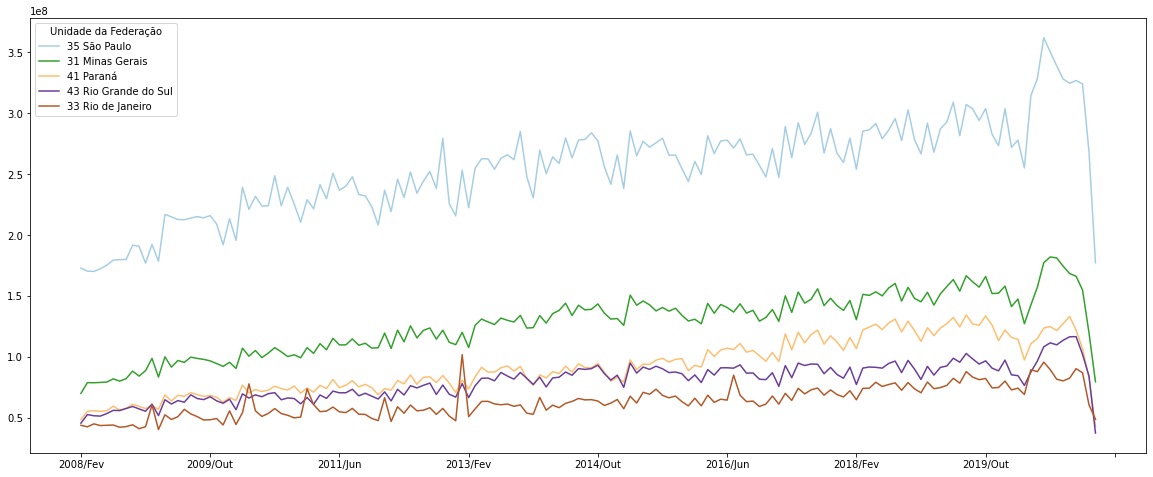

In [30]:
ordenado_por_total[colunas_interessadas[:]].head(5).T.plot(figsize=(20,8), cmap=plt.get_cmap('Paired'))

<AxesSubplot:>

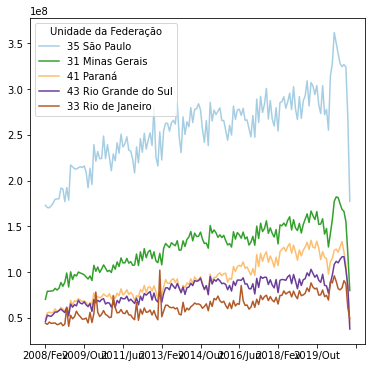

In [31]:
ordenado_por_total[colunas_interessadas[:]].head(5).T.plot(figsize=(6,6), cmap=plt.get_cmap('Paired'))

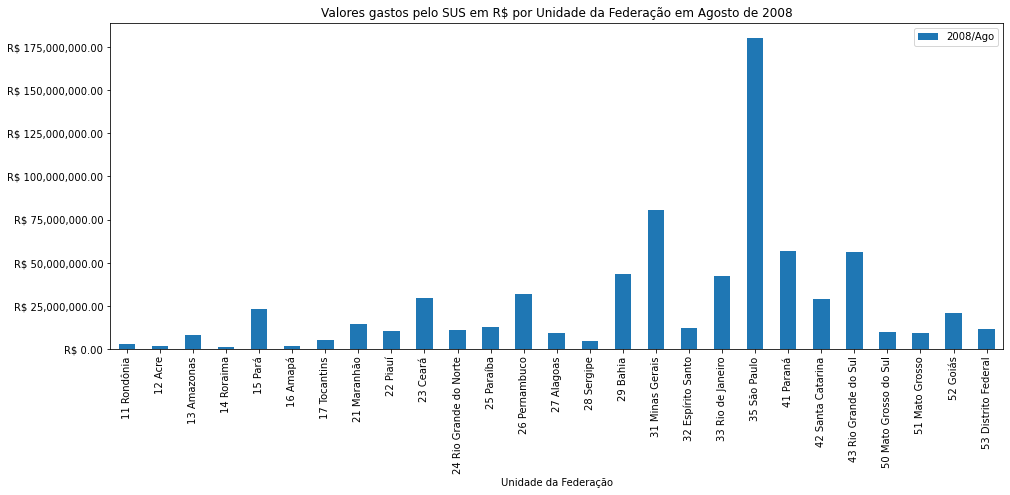

In [32]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(16,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valores gastos pelo SUS em R$ por Unidade da Federação em Agosto de 2008")
plt.show()

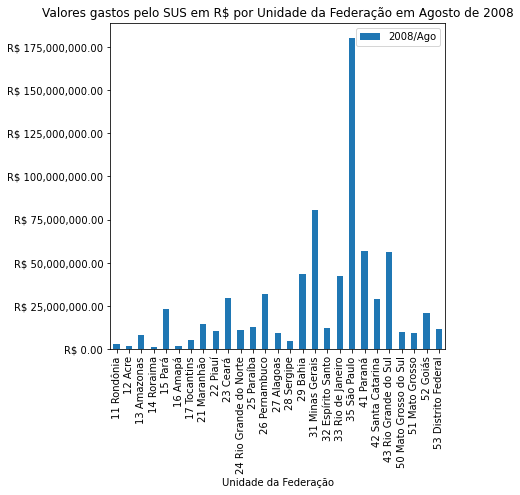

In [33]:
ax = dados.plot(x="Unidade da Federação", y="2008/Ago", kind="bar",figsize=(6,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Valores gastos pelo SUS em R$ por Unidade da Federação em Agosto de 2008")
plt.show()

### ---

<AxesSubplot:>

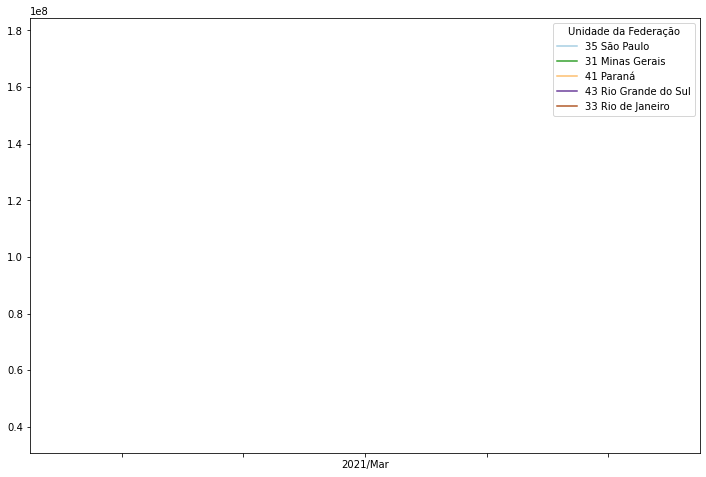

In [34]:
ordenado_por_total[colunas_interessadas[-1:]].head(5).T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))

In [35]:
mes_mais_recente = ordenado_por_total.columns[-2]
mes_mais_recente

'2021/Mar'

<AxesSubplot:>

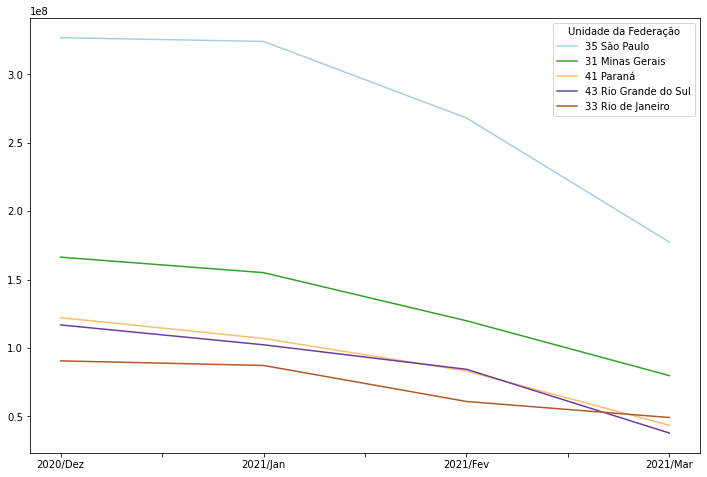

In [36]:
#vemos uma queda nos ultimos meses pois geralmente o lançamento do valor gasto é feito um tempo após 
ordenado_por_total[colunas_interessadas[-4:]].head(5).T.plot(figsize=(12,8), cmap=plt.get_cmap('Paired'))

<AxesSubplot:xlabel='Unidade da Federação'>

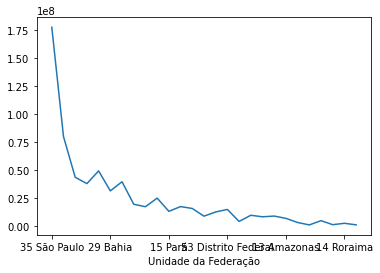

In [37]:
gasto_do_mais_recente = ordenado_por_total[mes_mais_recente]
gasto_do_mais_recente.plot()

<AxesSubplot:ylabel='2021/Mar'>

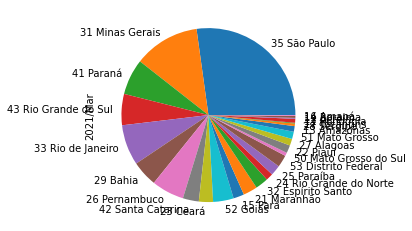

In [38]:
gasto_do_mais_recente.plot(kind='pie')

<AxesSubplot:xlabel='Unidade da Federação'>

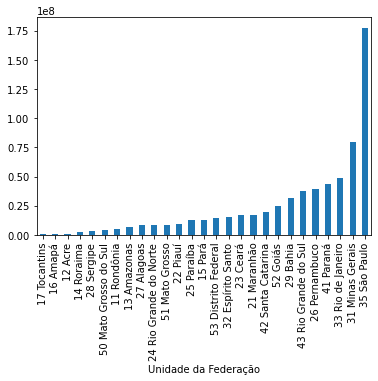

In [39]:
gasto_do_mais_recente.sort_values().plot(kind='bar')

In [40]:
gasto_do_mais_recente

Unidade da Federação
35 São Paulo             177408317.71
31 Minas Gerais           79780838.00
41 Paraná                 43480729.07
43 Rio Grande do Sul      37798832.80
33 Rio de Janeiro         49149884.48
29 Bahia                  31314602.44
26 Pernambuco             39472738.81
42 Santa Catarina         19375822.56
23 Ceará                  17173151.55
52 Goiás                  24867001.02
15 Pará                   13069564.31
21 Maranhão               17294509.11
32 Espírito Santo         15606368.11
24 Rio Grande do Norte     8733455.36
25 Paraíba                12517894.05
53 Distrito Federal       14731938.43
50 Mato Grosso do Sul      4035989.77
22 Piauí                   9542151.53
27 Alagoas                 8180887.21
51 Mato Grosso             8835890.09
13 Amazonas                6799060.80
28 Sergipe                 3081081.42
17 Tocantins                928756.84
11 Rondônia                4732441.04
12 Acre                    1137341.65
14 Roraima                 23

In [41]:
gasto_do_mais_recente / gasto_do_mais_recente["41 Paraná"]

Unidade da Federação
35 São Paulo             4.08
31 Minas Gerais          1.83
41 Paraná                1.00
43 Rio Grande do Sul     0.87
33 Rio de Janeiro        1.13
29 Bahia                 0.72
26 Pernambuco            0.91
42 Santa Catarina        0.45
23 Ceará                 0.39
52 Goiás                 0.57
15 Pará                  0.30
21 Maranhão              0.40
32 Espírito Santo        0.36
24 Rio Grande do Norte   0.20
25 Paraíba               0.29
53 Distrito Federal      0.34
50 Mato Grosso do Sul    0.09
22 Piauí                 0.22
27 Alagoas               0.19
51 Mato Grosso           0.20
13 Amazonas              0.16
28 Sergipe               0.07
17 Tocantins             0.02
11 Rondônia              0.11
12 Acre                  0.03
14 Roraima               0.05
16 Amapá                 0.02
Name: 2021/Mar, dtype: float64

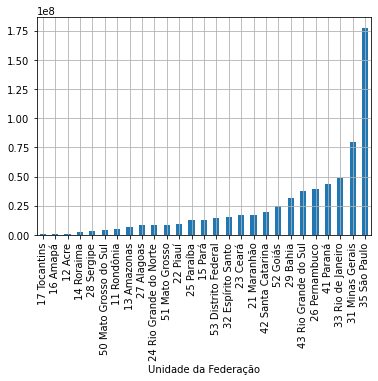

In [43]:
gasto_do_mais_recente.sort_values().plot(kind='bar')
plt.grid() #adiciona o grid no grafico!

<AxesSubplot:xlabel='Unidade da Federação'>

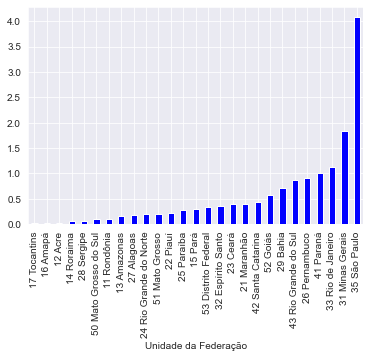

In [48]:
#grafico em função do paraná, por exemplo, são paulo é 4 vezes maior q o paraná!
func_parana = gasto_do_mais_recente / gasto_do_mais_recente["41 Paraná"]
plt.grid()
func_parana.sort_values().plot(kind='bar')
 #adiciona o grid no grafico!

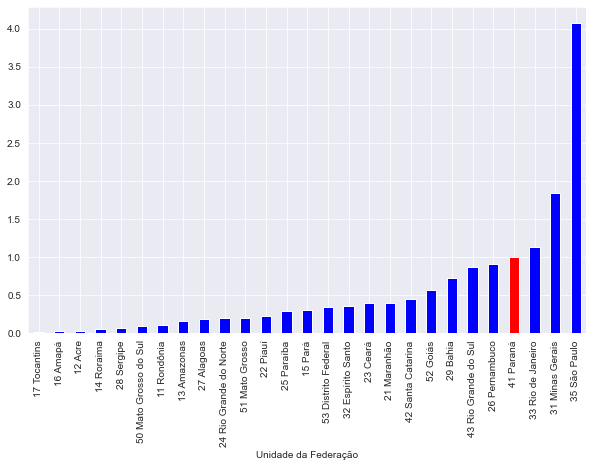

In [65]:
listacores = []
for i in func_parana.sort_values(ascending=True).index:
    if i[0:2] != "41":
        listacores.append("blue")
    else:
        listacores.append("red")        
        
ax = func_parana.sort_values(ascending=True).plot(kind='bar', figsize=(10,6), color=listacores)

 [<- Voltar para o repositório](https://github.com/aureliowozhiak/Bootcamp-Data-Science-Aplicada)